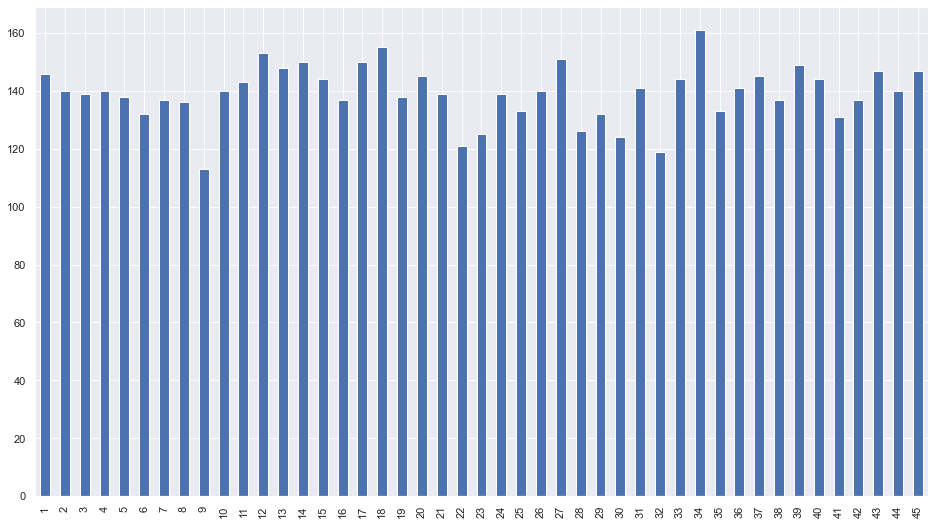

<AxesSubplot:>

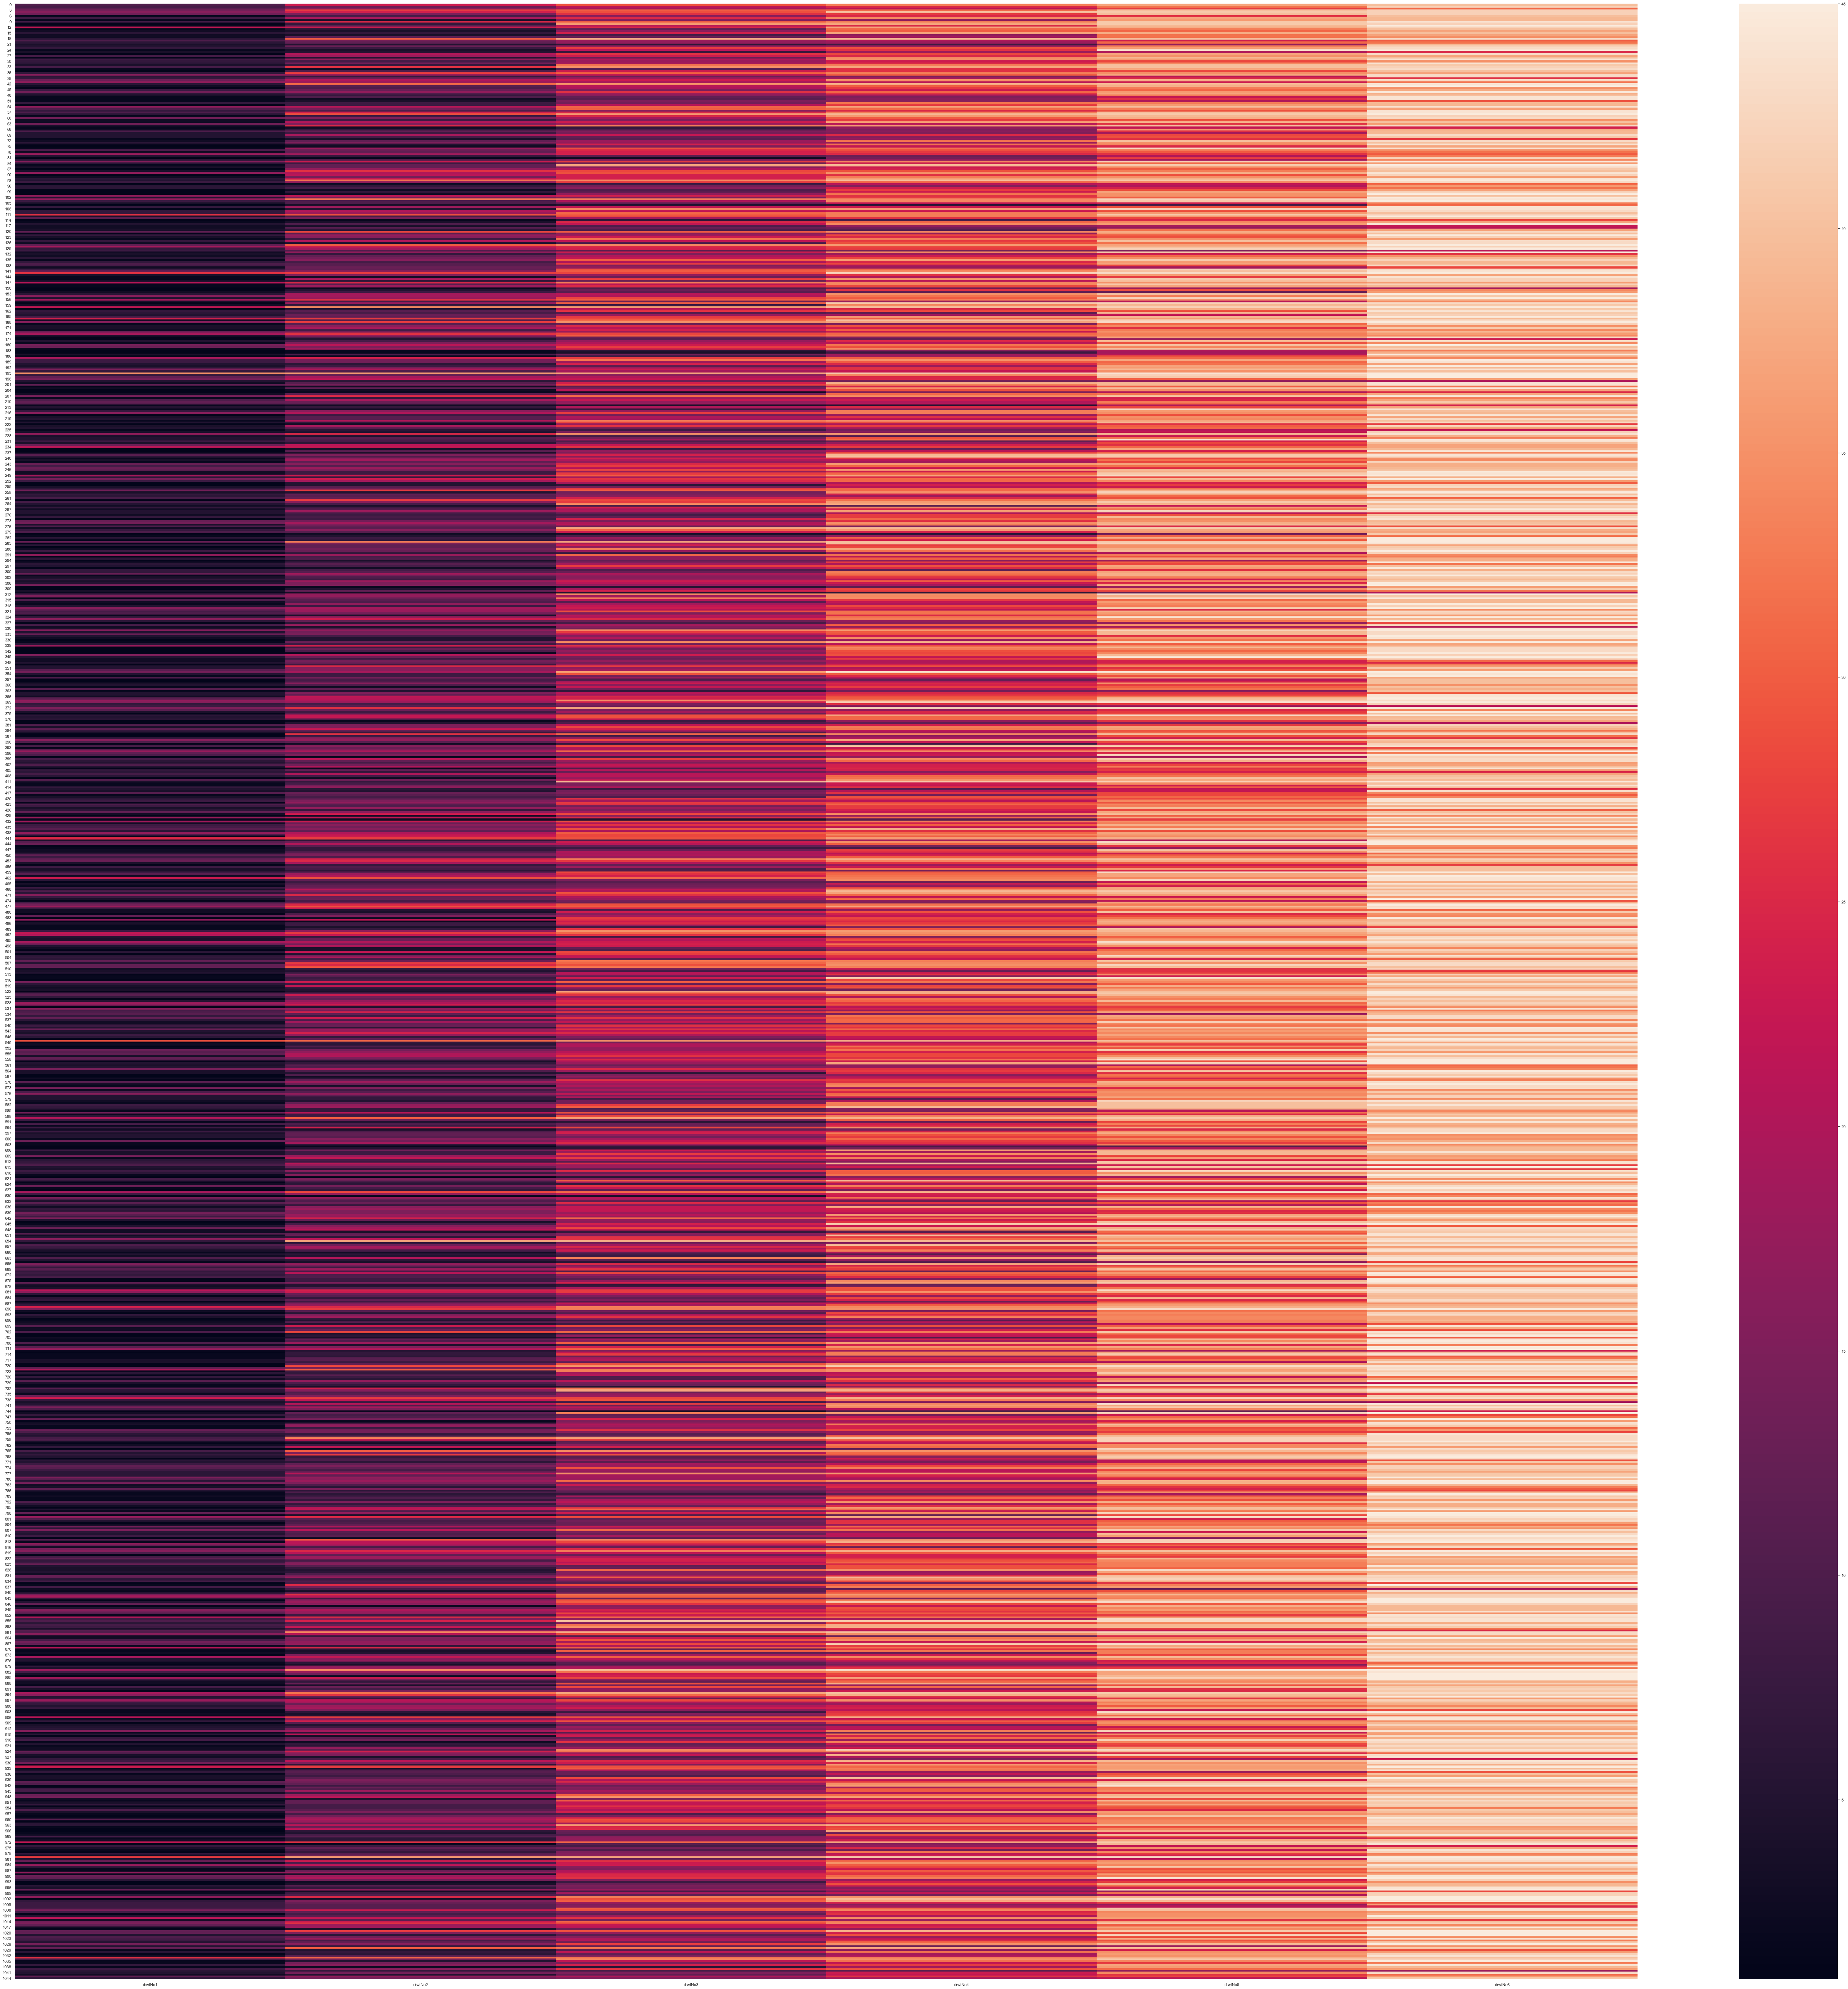

In [51]:
import csv
import urllib.request
import json

import pandas as pd


# 1~1045회차까지의 로또 정보를 csv로 저장하는 함수
def saveToCsv():
    result = []

    for i in range(1,1046):
        result.append(getLotto(i))
    df = pd.read_json(json.dumps(result))
    df.to_csv('data.csv')

# 로또 정보를 불러오는 API를 호출하여 JSON Object로 반환하는 함수
def getLotto(idx):
    req = urllib.request.Request(f"http://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo={idx}")    
    try: 
      response = urllib.request.urlopen(req)
      if response.getcode() == 200:
        print("Url Request Success")
        jsonObj = json.loads(response.read().decode('utf-8'))
        return jsonObj
    except Exception as e:
        print(e)
        print("Error for URL ")
        return None

# 저장한 csv 파일을 불러옴
tmp = pd.read_csv('data.csv')


#빈 딕셔너리 생성
tmp2 = dict()
for i in range(1,46):
    tmp2[i] = 0



# 각 번호(1~45)의 빈도 수를 저장하는 시리즈 생성
for _,row in tmp.iterrows():
    tmp2[row['drwtNo1']] += 1
    tmp2[row['drwtNo2']] += 1
    tmp2[row['drwtNo3']] += 1
    tmp2[row['drwtNo4']] += 1
    tmp2[row['drwtNo5']] += 1
    tmp2[row['drwtNo6']] += 1

tmp3 = pd.Series(tmp2)

# print(tmp3.head)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
tmp3.plot.bar()

plt.show()

import seaborn as sns


# www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=로또회차번호